## **Exploratory Data Analysis**

### **Import Dependencies**

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
from tqdm.auto import tqdm

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = 'Times New Roman'

# Specify the figure and csv output directory
fig_out_dir = r'D:\GITHUB\landscape-classification\datasets\figures'
csv_out_dir = r'D:\GITHUB\landscape-classification\datasets\csvs'

### **Read the Datasets**

In [71]:
# Read the image and mask file paths from the processed data
image_file_paths = glob(r"E:\KRISHNA\GITHUB\landscape-classification\datasets\raster_processed\*\Images\*.npy")
mask_file_paths = glob(r"E:\KRISHNA\GITHUB\landscape-classification\datasets\raster_processed\*\Masks\*.npy")

print('Number of images:', len(image_file_paths))
print('Number of masks:', len(mask_file_paths))

Number of images: 88916
Number of masks: 88916


In [72]:
# Read the 'country_sample_stat' and 'class_value_counts' file paths
country_sample_stat_paths = sorted(glob(r"E:\KRISHNA\GITHUB\landscape-classification\datasets\raster_processed\*\CSVs\country_samples_stat.csv"))
class_value_counts_paths = sorted(glob(r"E:\KRISHNA\GITHUB\landscape-classification\datasets\raster_processed\*\CSVs\class_value_count.csv"))

len(country_sample_stat_paths), len(class_value_counts_paths)

(37, 37)

In [73]:
# Merge the data into a single dataframe
country_sample_stat_df = pd.DataFrame()
class_value_counts_df = pd.DataFrame()

for c_p in tqdm(country_sample_stat_paths):
    country = c_p.split("\\")[6]
    c_df = pd.read_csv(c_p)
    c_df['country'] = country
    country_sample_stat_df = pd.concat((country_sample_stat_df, c_df), axis=0, ignore_index=True)

for c_p in tqdm(class_value_counts_paths):
    country = c_p.split("\\")[6]
    c_df = pd.read_csv(c_p)
    c_df['country'] = country
    class_value_counts_df = pd.concat((class_value_counts_df, c_df), axis=0, ignore_index=True)

print(country_sample_stat_df.shape, class_value_counts_df.shape)

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

(8888491, 16) (88916, 47)


### **Exploratorty Data Analysis**

#### **Calculate the Area Distribution of all Class in the Entire Dataset**

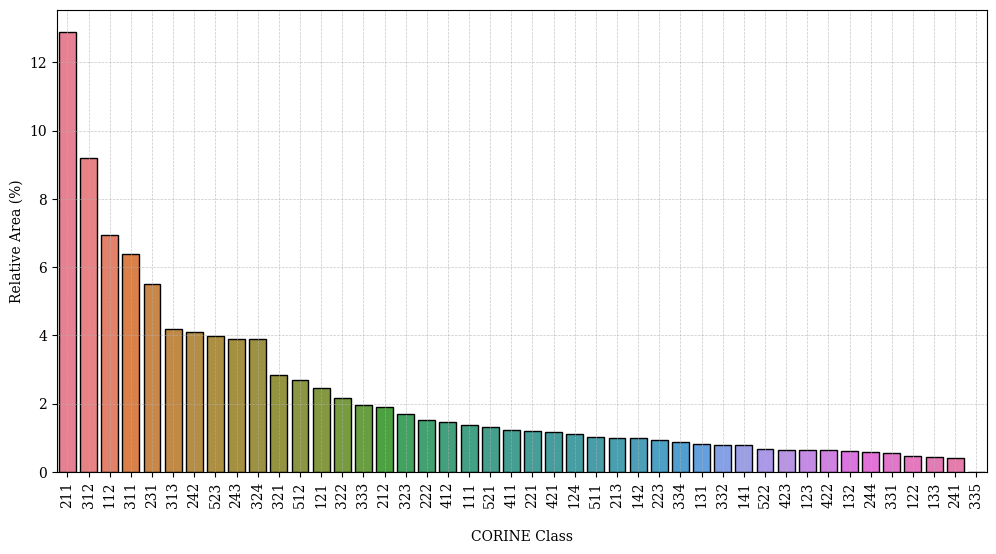

In [74]:
# Calculate the area distribution
area_distribution_per_class = (class_value_counts_df.iloc[:, :-3].sum(axis=0)) * 100 # area in sq. m.
area_distribution_per_class = area_distribution_per_class / 1e6 # convert into sq. km

# Calculate relative area distribution
relative_area_distribution_per_class = (area_distribution_per_class / area_distribution_per_class.sum()) * 100
relative_area_distribution_per_class.sort_values(inplace=True, ascending=False)

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=relative_area_distribution_per_class.index, 
            y=relative_area_distribution_per_class, 
            hue=relative_area_distribution_per_class.index,
            edgecolor='k')
plt.xlabel('\nCORINE Class')
plt.ylabel('Relative Area (%)')
plt.xticks(rotation=90)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig(fname=os.path.join(fig_out_dir, 'area_distribution_per_class.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

In [75]:
# save the data
# relative_area_distribution_per_class.to_csv(os.path.join(csv_out_dir, 'relative_area_distribution_per_class.csv'))

#### **Plot the Band Distribution**

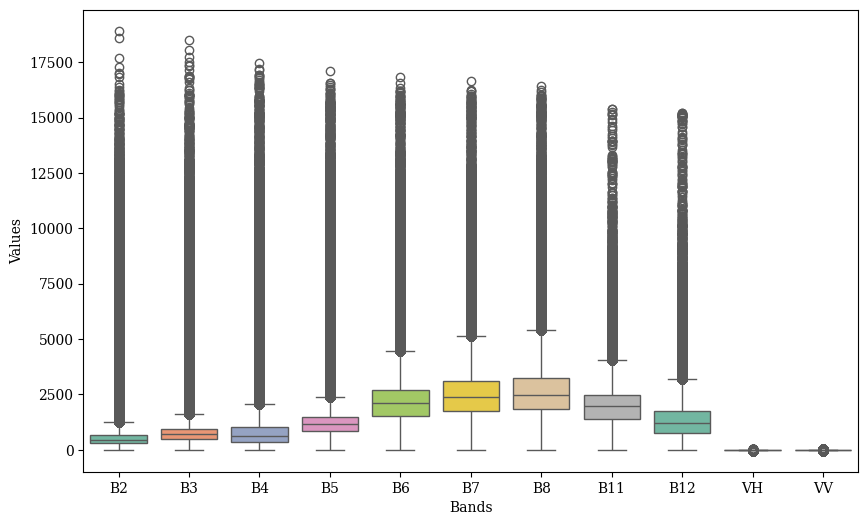

In [122]:
# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=country_sample_stat_df.iloc[:, 3:-2], palette='Set2')

# Customize labels and title
plt.xlabel('Bands')
plt.ylabel('Values')
plt.show()

### **Extract the Normalization Parameters**

In [116]:
# Calculate the 1st and 99th percentile for all the dataframes
percentiles = country_sample_stat_df.iloc[:, 3:-2].quantile([0.01, 0.99])

# Transpose to store percentiles as columns
percentiles_df = percentiles.T
percentiles_df.columns = ['1st Percentile', '99th Percentile']
percentiles_df['Band'] = percentiles_df.index
percentiles_df = percentiles_df[['Band', '1st Percentile', '99th Percentile']]
percentiles_df.reset_index(drop=True, inplace=True)
print(percentiles_df.shape)
percentiles_df

(11, 3)


,Band,1st Percentile,99th Percentile
0,B2,100.000000,3028.500000
1,B3,109.500000,3350.976060
2,B4,76.000000,3668.000000
3,B5,74.000000,3951.000000
4,B6,56.000000,4439.000000
5,B7,61.000000,5194.000000
6,B8,56.500000,5425.500000
7,B11,39.500000,4300.000000
8,B12,34.000000,3714.500000
9,VH,-32.237859,-8.134316


In [118]:
# Save the dataframe
# percentiles_df.to_csv(os.path.join(csv_out_dir, 'percentile_normalization_parameters.csv'), index=False)